In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
# new data
df = pd.read_csv('final_data.csv')

Summary statistics for numeric data

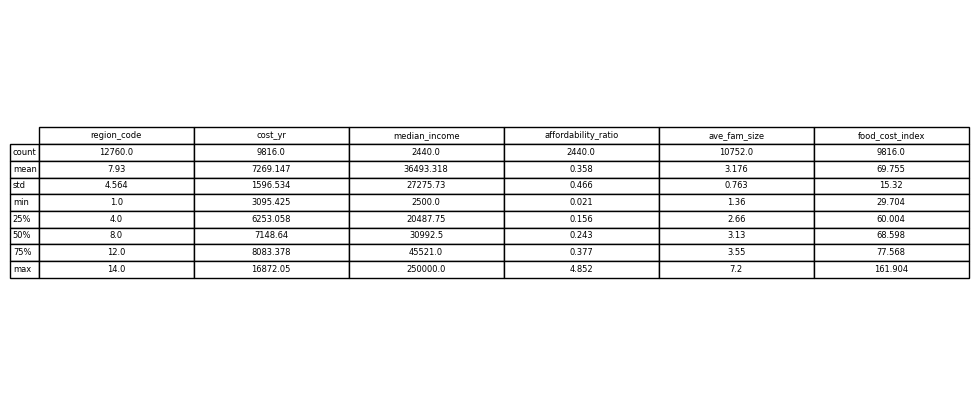

In [14]:
numeric_df = df.select_dtypes(include=['number'])
summary= df.describe().round(3)

fig, ax = plt.subplots(figsize=(12, 5))  # Adjust size as needed
# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=summary.values,
                 colLabels=summary.columns,
                 rowLabels=summary.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)  # Disable automatic font size
table.set_fontsize(6)

#plt.savefig('df_describe_output.png', bbox_inches='tight', dpi=300)  # Save as PNG
#plt.close()

Summary statistics for categorical data

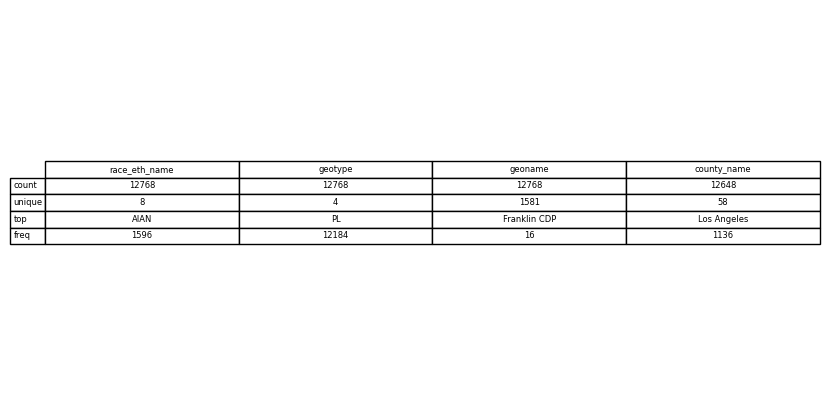

In [15]:
cat_df = df.select_dtypes(exclude=['number'])

cat_summary = cat_df.describe()

fig, ax = plt.subplots(figsize=(10, 5))  # Adjust size as needed
# Hide axes
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=cat_summary.values,
                 colLabels=cat_summary.columns,
                 rowLabels=cat_summary.index,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)  # Disable automatic font size
table.set_fontsize(6)

#plt.savefig('cat_describe_output.png', bbox_inches='tight', dpi=300)  # Save as PNG
#plt.close()

correlation matrix

In [7]:
numeric_df.columns

Index(['region_code', 'cost_yr', 'median_income', 'affordability_ratio',
       'LL95_affordability_ratio', 'UL95_affordability_ratio',
       'rse_food_afford', 'CA_RR_Affordability', 'ave_fam_size'],
      dtype='object')

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'region_code'),
  Text(0, 1.5, 'cost_yr'),
  Text(0, 2.5, 'median_income'),
  Text(0, 3.5, 'affordability_ratio'),
  Text(0, 4.5, 'ave_fam_size')])

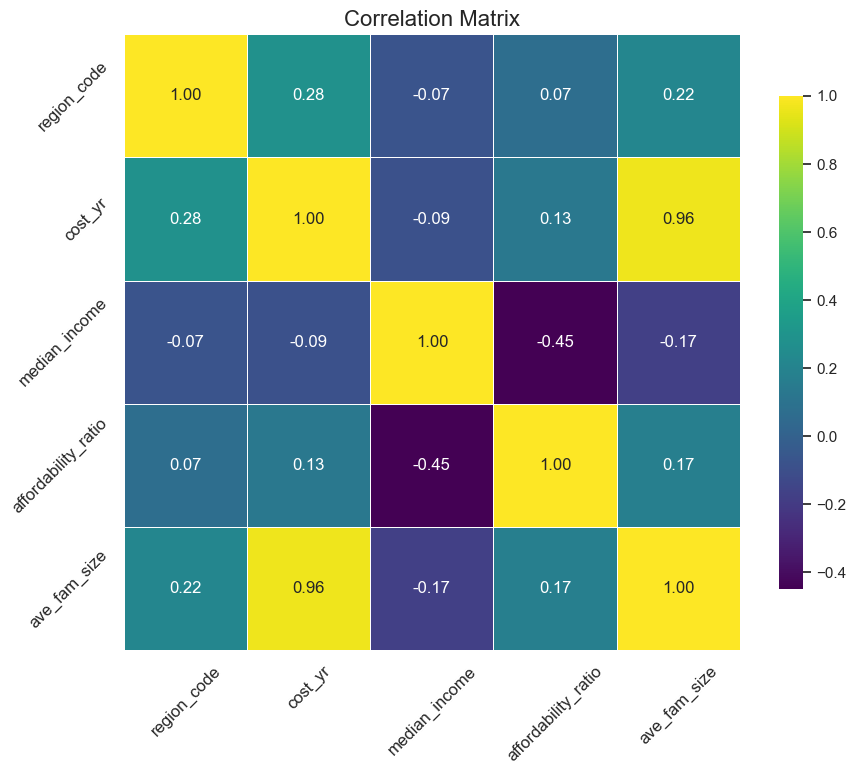

In [19]:
numeric_df = numeric_df.drop(columns = ['food_cost_index'])

corrs = numeric_df.corr()

plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(corrs, annot=True, fmt=".2f", cmap='viridis', 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12, rotation = 45)

#plt.savefig('correlation_matrix.png', bbox_inches='tight', dpi=300)  # Save as PNG
#plt.show()

Bar Plot of food affordability ratio by ethnic group

/var/folders/8f/l9_yqvn54_ldh6kclbdcgvfh0000gn/T/ipykernel_44274/1487534796.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race_eth_name', y='affordability_ratio', data=df, order=mean_values['race_eth_name'],  estimator='mean', palette='viridis', capsize=.2)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7000000000000001, '0.7'),
  Text(0, 0.8, '0.8')])

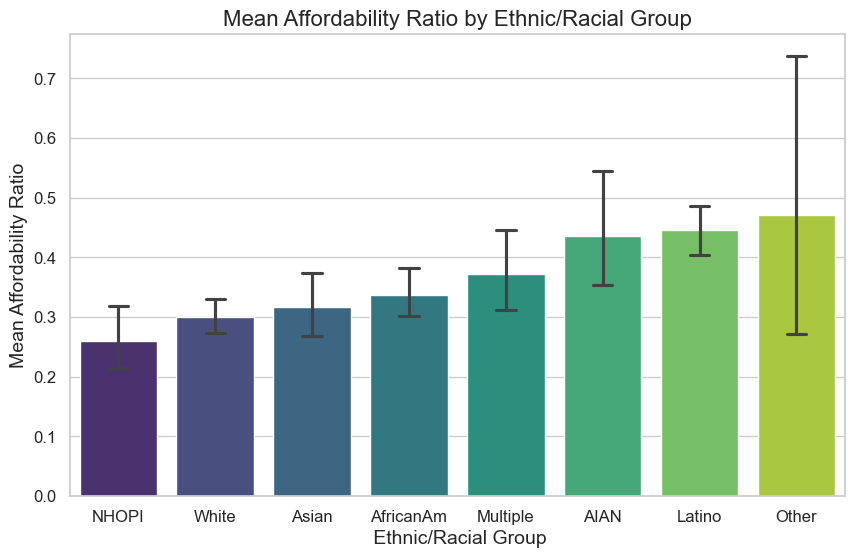

In [17]:
mean_values = df.groupby('race_eth_name')['affordability_ratio'].mean().reset_index()


# Sort the categories by the mean value
mean_values = mean_values.sort_values(by='affordability_ratio')

sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='race_eth_name', y='affordability_ratio', data=df, order=mean_values['race_eth_name'],  estimator='mean', palette='viridis', capsize=.2)

# Add titles and labels
plt.title('Mean Affordability Ratio by Ethnic/Racial Group', fontsize=16)
plt.xlabel(' Ethnic/Racial Group', fontsize=14)
plt.ylabel('Mean Affordability Ratio', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig('mean_afford_plot.png', bbox_inches='tight', dpi=300)  # Save as PNG
#plt.show()

/var/folders/8f/l9_yqvn54_ldh6kclbdcgvfh0000gn/T/ipykernel_44274/893444325.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='race_eth_name', y='median_income', data=df, order=mean_values['race_eth_name'],  estimator='mean', palette='viridis', capsize=.2)


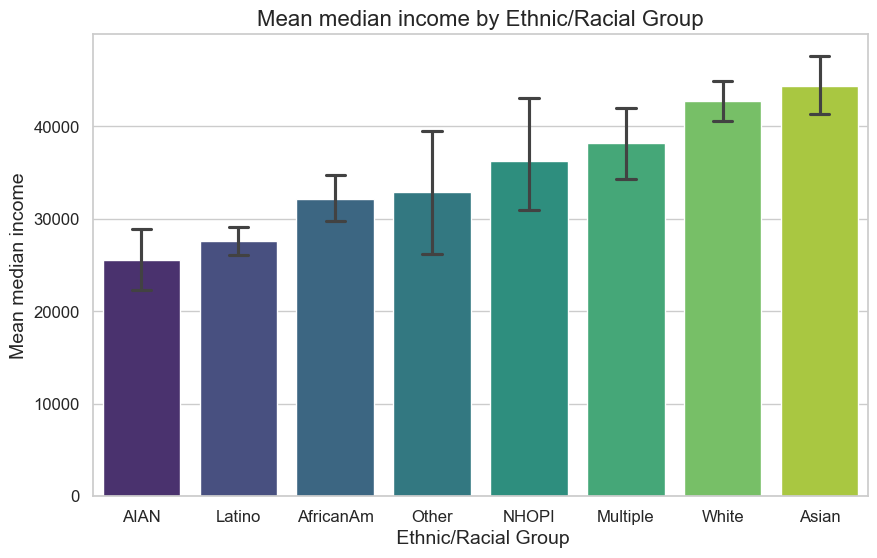

In [18]:
mean_values = df.groupby('race_eth_name')['median_income'].mean().reset_index()


# Sort the categories by the mean value
mean_values = mean_values.sort_values(by='median_income')

sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a bar plot
sns.barplot(x='race_eth_name', y='median_income', data=df, order=mean_values['race_eth_name'],  estimator='mean', palette='viridis', capsize=.2)

# Add titles and labels
plt.title('Mean median income by Ethnic/Racial Group', fontsize=16)
plt.xlabel(' Ethnic/Racial Group', fontsize=14)
plt.ylabel('Mean median income', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('mean_med_income_plot.png', bbox_inches='tight', dpi=300)  # Save as PNG
plt.show()

Bar Plot of food affordability ratio by family size

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000'),
  Text(0, 300000.0, '300000')])

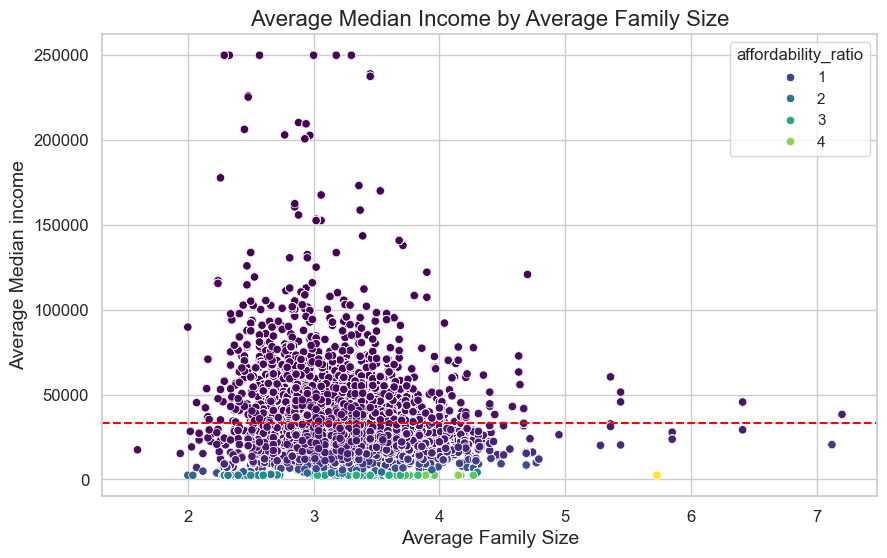

In [ ]:
mean_values = df.groupby('ave_fam_size')['median_income'].mean().reset_index()
med_income = df['median_income'].median()

# Sort the categories by the mean value
mean_values = mean_values.sort_values(by='median_income')

sns.set_theme(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ave_fam_size', y='median_income', data=df, 
                #order=mean_values['ave_fam_size'],  
                #estimator='mean', 
                palette='viridis', 
                #capsize=.2)
                hue = 'affordability_ratio'
)
plt.axhline(y=med_income, color='red', linestyle='--', label=f'Median Income = {med_income:.2f}')
# Add titles and labels
plt.title('Average Median Income by Average Family Size', fontsize=16)
plt.xlabel('Average Family Size', fontsize=14)
plt.ylabel('Average Median income', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.savefig('income_fam_size_plot.png', bbox_inches='tight', dpi=300)  # Save as PNG
#plt.show()

/var/folders/8f/l9_yqvn54_ldh6kclbdcgvfh0000gn/T/ipykernel_44274/208480179.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='ave_fam_size', y='affordability_ratio', data=df,


<Axes: xlabel='ave_fam_size', ylabel='affordability_ratio'>

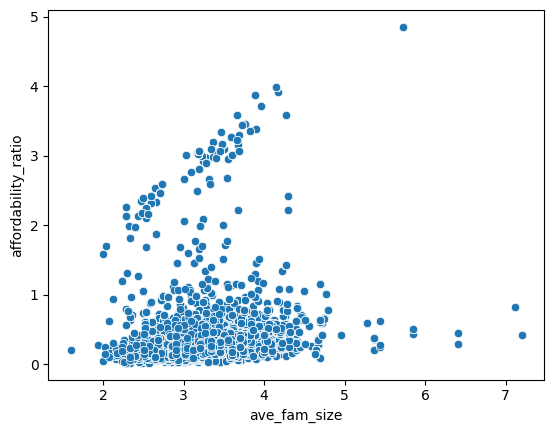

In [8]:
# family size and affordability ratio

sns.scatterplot(x='ave_fam_size', y='affordability_ratio', data=df,
                #order=mean_values['ave_fam_size'],  
                #estimator='mean', 
                palette='viridis'
                #capsize=.2)
                #hue = 'affordability_ratio'
)